In [296]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from scipy.stats import randint

from sklearn.metrics import confusion_matrix, RocCurveDisplay, auc
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')





In [297]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (9).csv


{'diabetes (9).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [298]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [299]:
print("dimension of diabetes data: {}".format(data.shape))

dimension of diabetes data: (768, 9)


In [300]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


Text(0.5, 1.0, 'Outcome Distribution')

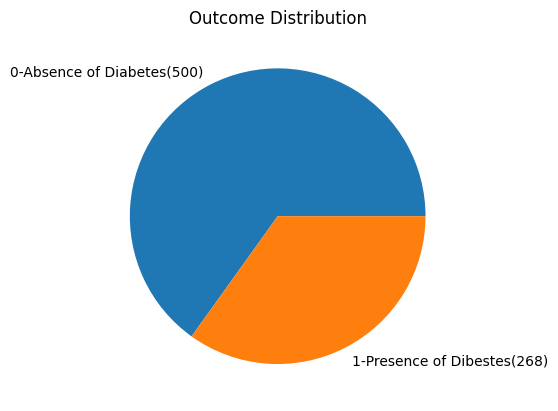

In [301]:
plt.pie([data.groupby('Outcome').size()[0],data.groupby('Outcome').size()[1]], labels = ['0-Absence of Diabetes(500)','1-Presence of Dibestes(268)'])
plt.title('Outcome Distribution')

In [302]:
# null values from each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [303]:
# any duplicate values or not
data.duplicated().sum()

0

In [304]:
# Nutritional status based on BMI
data['Nutritional_status']=0

for i in range(len(data)):
  if data['BMI'][i] == 0.0:
    data['Nutritional_status'][i]='Obese'
  elif data['BMI'][i] < 18.5:
    data['Nutritional_status'][i]="Underweight"
  elif data['BMI'][i] < 25:
    data['Nutritional_status'][i]="Normal"
  elif data['BMI'][i] >= 25 and data['BMI'][i] < 30:
    data['Nutritional_status'][i]="Overweight"
  elif data['BMI'][i] >= 30:
    data['Nutritional_status'][i]="Obese"
  else:
    data['Nutritional_status'][i]= data['BMI'][i]

In [305]:
data['Nutritional_status'].value_counts()

Obese          483
Overweight     179
Normal         102
Underweight      4
Name: Nutritional_status, dtype: int64

Text(0.5, 1.0, 'Nutritional_status Distribution')

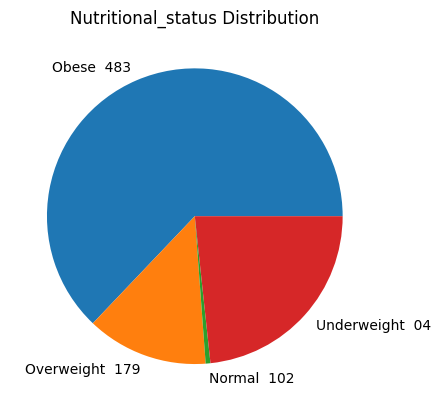

In [306]:
plt.pie([data.groupby('Nutritional_status').size()['Obese'],data.groupby('Nutritional_status').size()['Normal'],data.groupby('Nutritional_status').size()['Underweight'], data.groupby('Nutritional_status').size()['Overweight']], labels = ['Obese  483','Overweight  179','Normal  102','Underweight  04'])
plt.title('Nutritional_status Distribution')

In [307]:
# Done using OGTT levels recommended by DIABETES UK (2019)
data['OGTT_Interpretation']=0
for i in range(len(data)):
  if data['Glucose'][i] == 0.0:
    data['OGTT_Interpretation'] [i]='Normal'
  elif data['Glucose'][i] <= 140:
    data['OGTT_Interpretation'] [i]="Normal"
  elif data['Glucose'][i] > 140 & data['Glucose'][i] <= 198:
    data['OGTT_Interpretation'] [i]="Impaired Glucose Tolerance"
  elif data['Glucose'][i] > 198:
    data['OGTT_Interpretation'][i]="Diabetic Level"
  else:
    data['OGTT_Interpretation'] [i]= data['Glucose'][i]

In [308]:
data['OGTT_Interpretation'].value_counts()

Normal                        576
Impaired Glucose Tolerance    192
Name: OGTT_Interpretation, dtype: int64

Text(0.5, 1.0, 'OGTT_Interpretation Distribution')

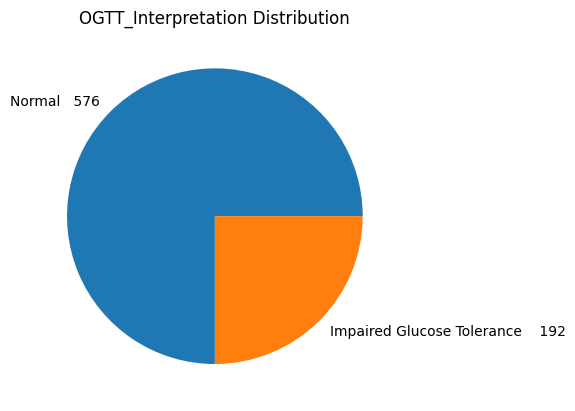

In [309]:
plt.pie([data.groupby('OGTT_Interpretation').size()['Normal'],data.groupby('OGTT_Interpretation').size()['Impaired Glucose Tolerance']],labels = ['Normal   576','Impaired Glucose Tolerance    192'])
plt.title('OGTT_Interpretation Distribution')

In [310]:
for i in range(len(data)):
  if data['SkinThickness'][i] == 0.0:
    data['SkinThickness'] [i]=None

In [311]:
for i in range(len(data)):
  if data['BloodPressure'][i] == 0.0:
    data['BloodPressure'] [i]=None

In [312]:
for i in range(len(data)):
  if data['Insulin'][i] == 0.0:
    data['Insulin'] [i]=None

In [313]:
for i in range(len(data)):
  if data['Glucose'][i] == 0.0:
    data['Glucose'] [i]=None

In [314]:
for i in range(len(data)):
  if data['BMI'][i] == 0.0:
    data['BMI'] [i]=None

In [315]:
# null values from each column
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Nutritional_status            0
OGTT_Interpretation           0
dtype: int64

NA values in BMI are 11. That is no data found for BMI of 11 people.

NA values in Glucose are 11. That is no data found for Glucose of 11 people.

In [316]:
mean_imputer = SimpleImputer(strategy='mean')
data_int = data.iloc[:,:8]
data_int = pd.DataFrame(mean_imputer.fit_transform(data_int), columns=data_int.columns)
data_non_int = data.iloc[:,9:]
data_non_int
data = pd.concat([data_int,data_non_int,data['Outcome']],axis=1)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Nutritional_status          0
OGTT_Interpretation         0
Outcome                     0
dtype: int64

In [317]:
# Converting Categorical Data to Numerical Data

le_nut = LabelEncoder()
data['Nutritional_status']=le_nut.fit_transform(data['Nutritional_status'])

le_og = LabelEncoder()
data['OGTT_Interpretation']=le_og.fit_transform(data['OGTT_Interpretation'])

In [318]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Nutritional_status,OGTT_Interpretation,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1,0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,2,1,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,0,0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,2,1,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,1,1,0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,1,1,0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,2,1,0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1,1,1


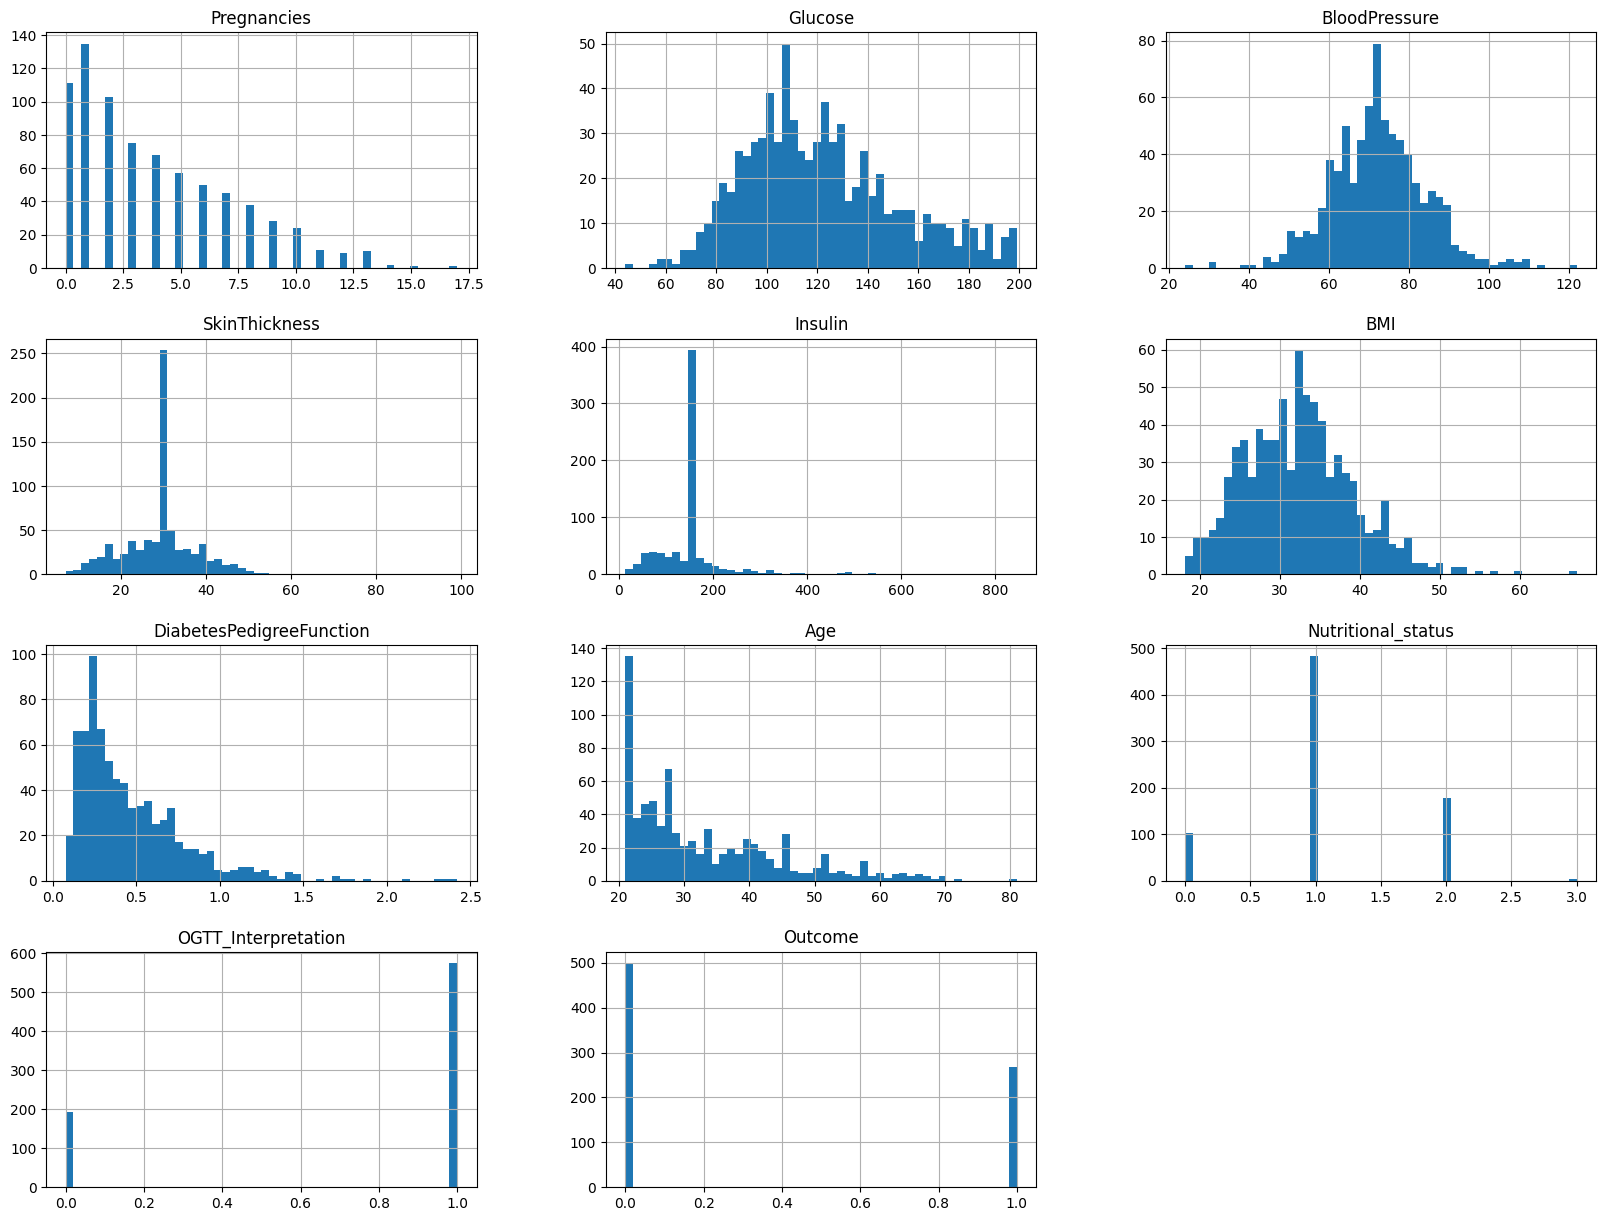

In [319]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

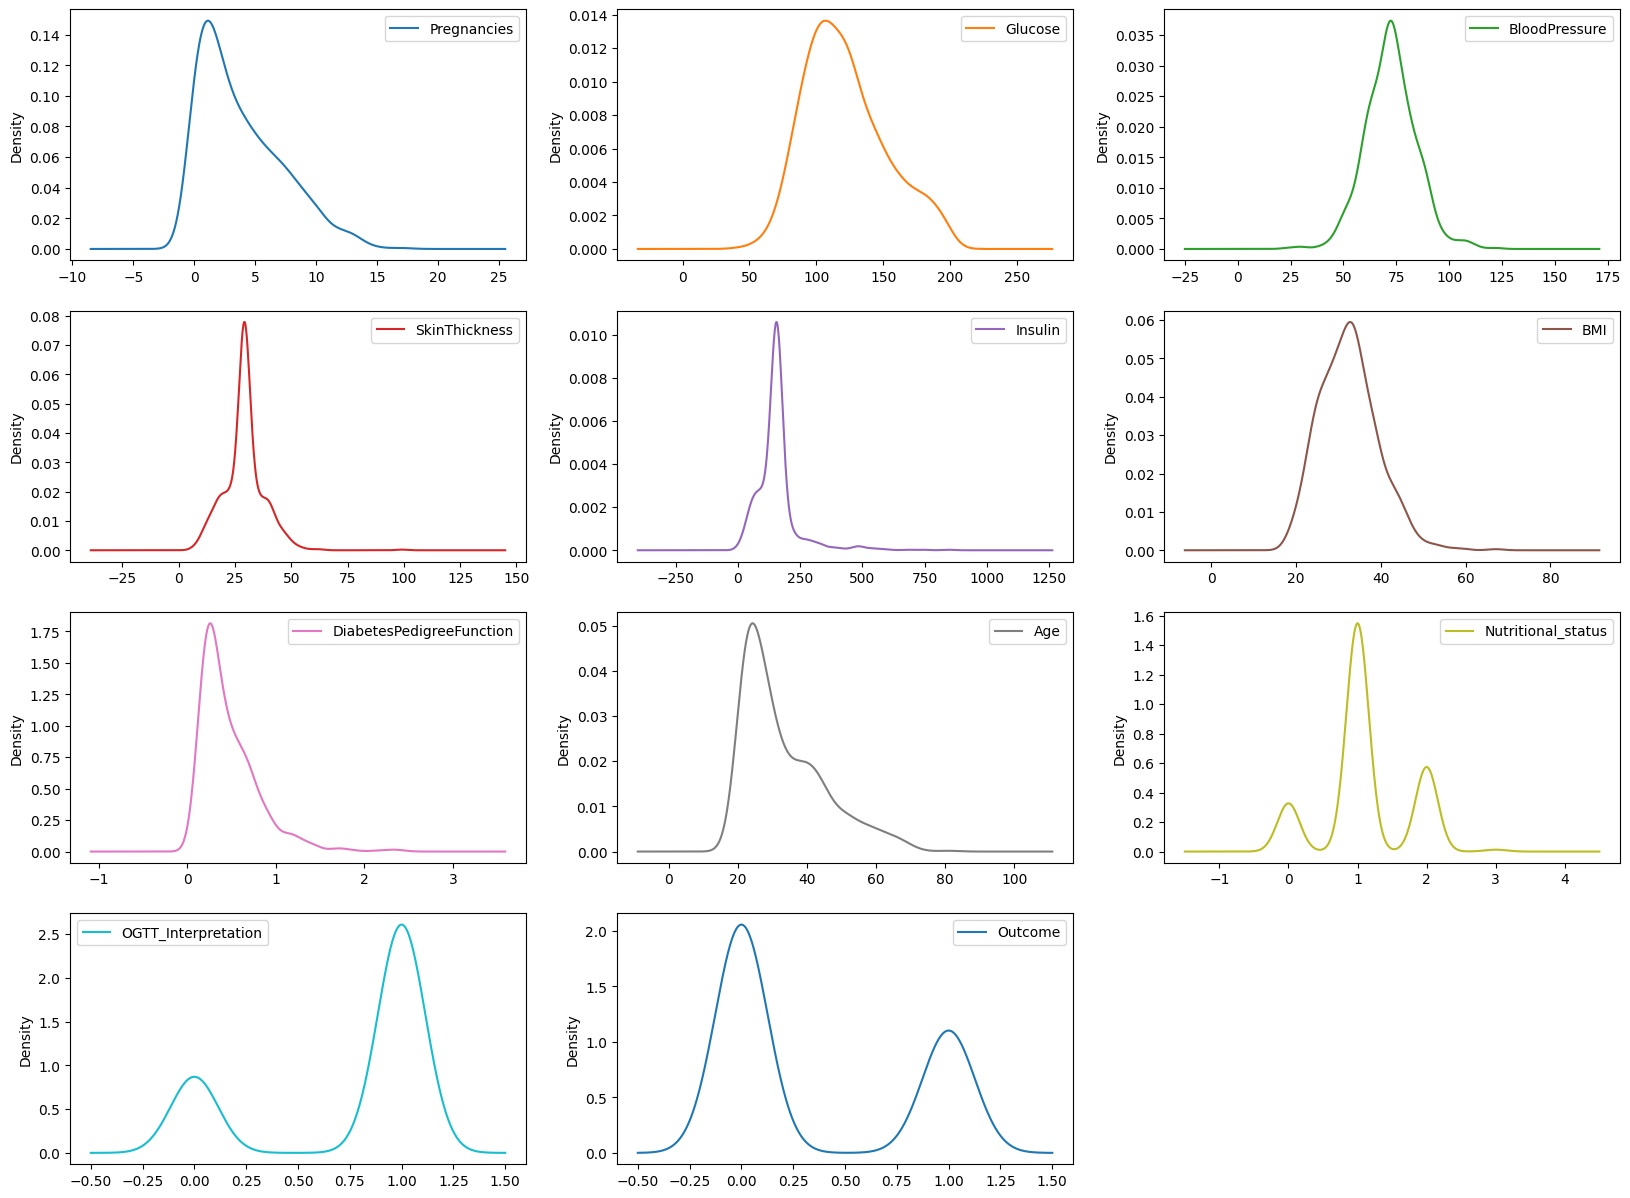

In [320]:
data.plot(kind='density', subplots=True, layout=(4,3), figsize=(20, 15), sharex=False)
plt.show()

# Bell shape curve:
Blood Pressure

#Right-Skewed:
Pregnancies, Glucose, Insulin, BMI, Diabetes Pedigree Function, Age, SkinThickness

# Standardization or Normalization decision

Certain statistical tests and models rely on the assumption that the data is normally distributed. These presumptions could be broken if the right skewness is considerable, which could have an impact on the analysis's validity. It could be essential to employ different statistical techniques or transformations in certain situations.





Pregnancies                    Axes(0.125,0.712609;0.227941x0.167391)
Glucose                     Axes(0.398529,0.712609;0.227941x0.167391)
BloodPressure               Axes(0.672059,0.712609;0.227941x0.167391)
SkinThickness                  Axes(0.125,0.511739;0.227941x0.167391)
Insulin                     Axes(0.398529,0.511739;0.227941x0.167391)
BMI                         Axes(0.672059,0.511739;0.227941x0.167391)
DiabetesPedigreeFunction        Axes(0.125,0.31087;0.227941x0.167391)
Age                          Axes(0.398529,0.31087;0.227941x0.167391)
Nutritional_status           Axes(0.672059,0.31087;0.227941x0.167391)
OGTT_Interpretation                Axes(0.125,0.11;0.227941x0.167391)
Outcome                         Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

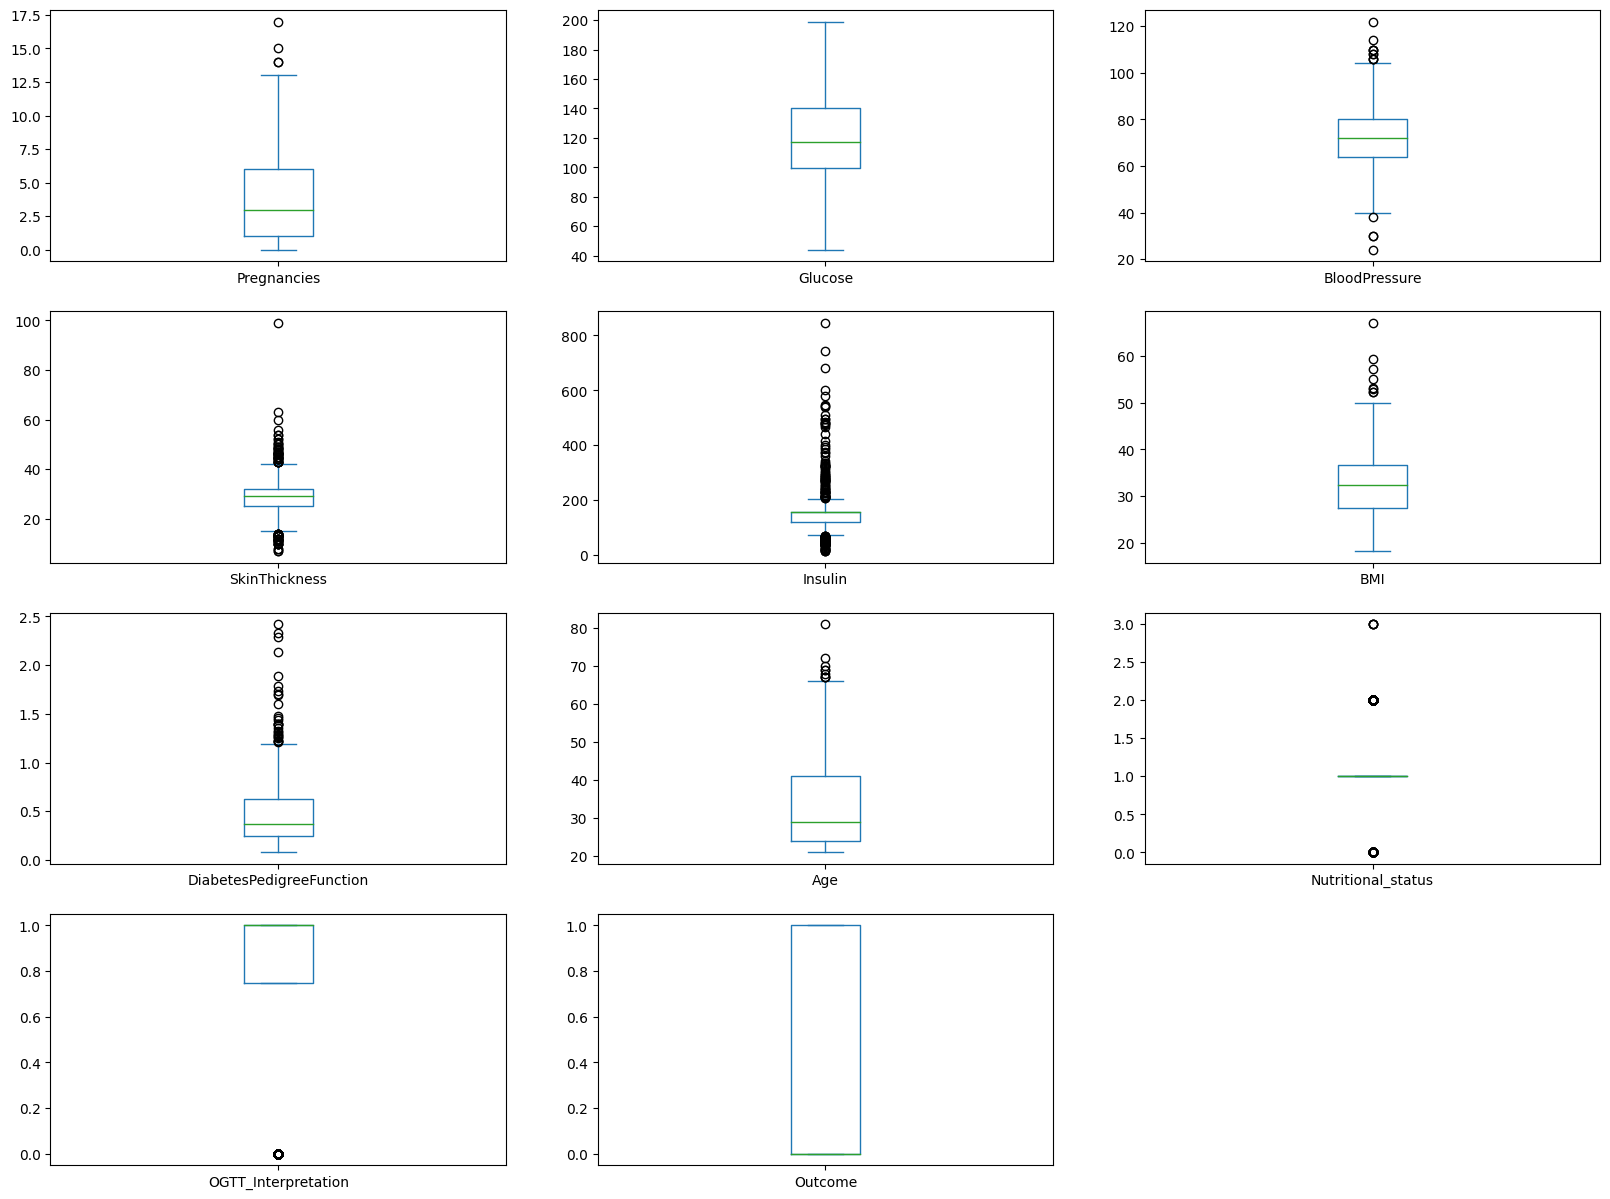

In [321]:
data.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,15))

Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI

A measure of statistical dispersion, or more precisely, the spread of a dataset, is the Interquartile Range (IQR). It is computed as follows and represents the range between the first quartile (Q1) and the third quartile (Q3):


IQR = Q3-Q1

The center 50% of the data are grouped together if the IQR is short, indicating a relatively modest dispersion or variability in that core region of the dataset. This may indicate a more stable or homogeneous distribution within that range. It may also suggest that the data is more normal or Gaussian in shape.

A minimum of 75% of the females:
1. be pregnant one or more times
2. possess a glucose level of at least 100 mg/dL.
3. Have a blood pressure of at least 60 mmHg.
4. The BMI is around 30 kg/m2.
5. Have a 100 or higher insulin level
6. are at least 25 years old

In [322]:
standardscaler = StandardScaler()
minmax_scale = MinMaxScaler()
data_scaled = pd.DataFrame()
data_scaled[['BloodPressure']] = standardscaler.fit_transform(data[['BloodPressure']])
data_scaled[[ 'SkinThickness','Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Nutritional_status','OGTT_Interpretation']] = minmax_scale.fit_transform(data[[ 'SkinThickness','Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Nutritional_status','OGTT_Interpretation']])
data_scaled['Outcome'] = data['Outcome']

In [323]:
data_scaled

,BloodPressure,SkinThickness,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Nutritional_status,OGTT_Interpretation,Outcome
0,-0.033518,0.304348,0.352941,0.670968,0.170130,0.314928,0.234415,0.483333,0.333333,0.0,1
1,-0.529859,0.239130,0.058824,0.264516,0.170130,0.171779,0.116567,0.166667,0.666667,1.0,0
2,-0.695306,0.240798,0.470588,0.896774,0.170130,0.104294,0.253629,0.183333,0.000000,0.0,1
3,-0.529859,0.173913,0.058824,0.290323,0.096154,0.202454,0.038002,0.000000,0.666667,1.0,0
4,-2.680669,0.304348,0.000000,0.600000,0.185096,0.509202,0.943638,0.200000,0.333333,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,0.297376,0.445652,0.588235,0.367742,0.199519,0.300613,0.039710,0.700000,0.333333,1.0,0
764,-0.198965,0.217391,0.117647,0.503226,0.170130,0.380368,0.111870,0.100000,0.333333,1.0,0
765,-0.033518,0.173913,0.294118,0.496774,0.117788,0.163599,0.071307,0.150000,0.666667,1.0,0
766,-1.026200,0.240798,0.058824,0.529032,0.170130,0.243354,0.115713,0.433333,0.333333,1.0,1


<Axes: >

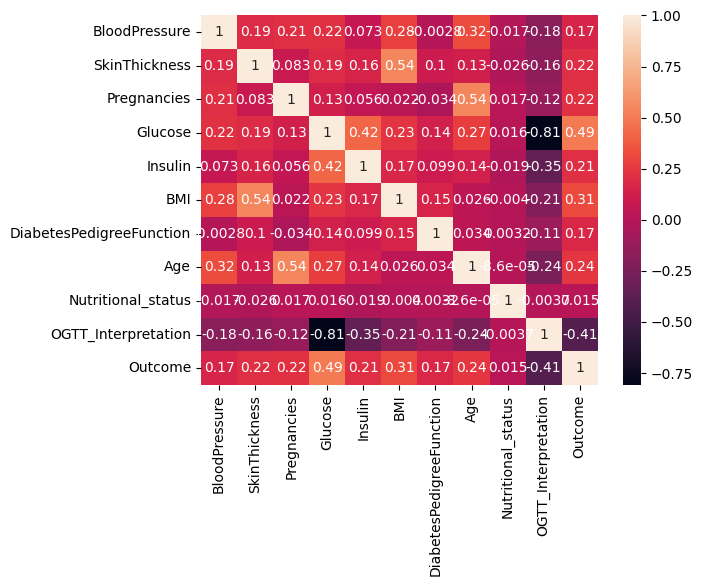

In [324]:
corr_matrix_pearson = data_scaled.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot = True)

In [325]:
corr_matrix_pearson

,BloodPressure,SkinThickness,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Nutritional_status,OGTT_Interpretation,Outcome
BloodPressure,1.000000,0.192816,0.208522,0.218367,0.072517,0.281268,-0.002763,0.324595,-0.017361,-0.182346,0.166074
SkinThickness,0.192816,1.000000,0.082989,0.192991,0.158139,0.542398,0.100966,0.127872,-0.026374,-0.157891,0.215299
Pregnancies,0.208522,0.082989,1.000000,0.127911,0.056027,0.021565,-0.033523,0.544341,0.017169,-0.119437,0.221898
Glucose,0.218367,0.192991,0.127911,1.000000,0.420157,0.230941,0.137060,0.266534,0.016134,-0.809110,0.492928
Insulin,0.072517,0.158139,0.056027,0.420157,1.000000,0.166586,0.098634,0.136734,-0.019361,-0.345291,0.214411
BMI,0.281268,0.542398,0.021565,0.230941,0.166586,1.000000,0.153400,0.025519,-0.003959,-0.207525,0.311924
DiabetesPedigreeFunction,-0.002763,0.100966,-0.033523,0.137060,0.098634,0.153400,1.000000,0.033561,0.003216,-0.106425,0.173844
Age,0.324595,0.127872,0.544341,0.266534,0.136734,0.025519,0.033561,1.000000,-0.000086,-0.240446,0.238356
Nutritional_status,-0.017361,-0.026374,0.017169,0.016134,-0.019361,-0.003959,0.003216,-0.000086,1.000000,-0.003685,0.014904
OGTT_Interpretation,-0.182346,-0.157891,-0.119437,-0.809110,-0.345291,-0.207525,-0.106425,-0.240446,-0.003685,1.000000,-0.410072


The correlation between different characteristics is better when it approaches 1.

There are no strong correlation between the features. The 'strongest' ones are the following (as expected):

Positive:
1. Pregnancies x Age: 0.544 : Older women tend to have higher number of pregnancies
2. SkinThickness x BMI: 0.544 : Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

Negative:
1. Glucose x OGTT_Interpretation : -.809 : Women with high glucose levels are tend to be having more Impaired Glucose Tolerance

In [326]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BloodPressure             768 non-null    float64
 1   SkinThickness             768 non-null    float64
 2   Pregnancies               768 non-null    float64
 3   Glucose                   768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Nutritional_status        768 non-null    float64
 9   OGTT_Interpretation       768 non-null    float64
 10  Outcome                   768 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 66.1 KB


In [327]:
x = data_scaled.drop('Outcome', axis=1)
y = data_scaled['Outcome']

In [328]:
#use mutual information classify to select mutual feature
def make_mi_scores(x, y):
    mi_scores = mutual_info_classif(x, y, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)

# show a few features with their MI scores
mi_scores

Glucose                     0.132500
BMI                         0.091448
OGTT_Interpretation         0.058362
Nutritional_status          0.056516
Age                         0.050640
Insulin                     0.045625
SkinThickness               0.022216
DiabetesPedigreeFunction    0.017211
Pregnancies                 0.013572
BloodPressure               0.000000
Name: MI Scores, dtype: float64

[]

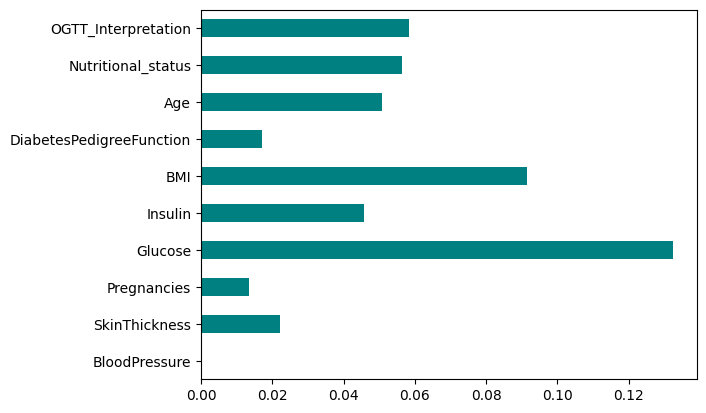

In [329]:
id = mutual_info_classif(x,y,random_state=42)
feature_imp = pd.Series(id, x.columns)
feature_imp.plot(kind = 'barh', color = 'teal')
plt.plot()

In [330]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.00]

x = drop_uninformative(x, mi_scores)
x

,SkinThickness,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Nutritional_status,OGTT_Interpretation
0,0.304348,0.352941,0.670968,0.170130,0.314928,0.234415,0.483333,0.333333,0.0
1,0.239130,0.058824,0.264516,0.170130,0.171779,0.116567,0.166667,0.666667,1.0
2,0.240798,0.470588,0.896774,0.170130,0.104294,0.253629,0.183333,0.000000,0.0
3,0.173913,0.058824,0.290323,0.096154,0.202454,0.038002,0.000000,0.666667,1.0
4,0.304348,0.000000,0.600000,0.185096,0.509202,0.943638,0.200000,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
763,0.445652,0.588235,0.367742,0.199519,0.300613,0.039710,0.700000,0.333333,1.0
764,0.217391,0.117647,0.503226,0.170130,0.380368,0.111870,0.100000,0.333333,1.0
765,0.173913,0.294118,0.496774,0.117788,0.163599,0.071307,0.150000,0.666667,1.0
766,0.240798,0.058824,0.529032,0.170130,0.243354,0.115713,0.433333,0.333333,1.0


In [331]:
ss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42, shuffle = True)
x_train.size, x_test.size, y_train.size, y_test.size

(4833, 2079, 537, 231)

In [333]:
print('KNN')
print('-'*50)

# Creating the hyperparameter grid
param_dist = {"n_neighbors":range(1, 41),
              "p": range(1, 11)}

# Instantiating Nearest Neighbours classifier
knn_model = KNeighborsClassifier()

# Instantiating GridSearchCV object
knn_model_cv = GridSearchCV(knn_model, param_dist, cv = ss, scoring='accuracy')

result = knn_model_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Knn Parameters: {}".format(result.best_params_))

print('-'*50)

knn_model = knn_model_cv.best_estimator_
knn_scores = cross_validate(knn_model, x_train, y_train,return_train_score=True, scoring=['accuracy', 'balanced_accuracy', 'recall','precision','f1'])
pred_knn = cross_val_predict(knn_model, x_test, y_test)

# Calculate and print the overall classification report
overall_report = classification_report(y_test, pred_knn)
print("Overall Classification Report:\n", overall_report)
print(f"\n Training Accuracy : {knn_scores['train_accuracy'].mean()}, \n Testing Accuracy : {knn_scores['test_accuracy'].mean()}, \n Balanced Accuracy : {knn_scores['test_balanced_accuracy'].mean()}, \n Precision : {knn_scores['test_precision'].mean()}, \n Recall : {knn_scores['test_recall'].mean()}, \n F1-knn_scores : {knn_scores['test_f1'].mean()}")
print('-'*50)

# Calculate and print the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test, pred_knn)
print("Overall Confusion Matrix:\n", overall_conf_matrix)
print('-'*50)

KNN
--------------------------------------------------
Tuned Knn Parameters: {'n_neighbors': 28, 'p': 2}
--------------------------------------------------
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       151
           1       0.63      0.50      0.56        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231


 Training Accuracy : 0.7737323141974305, 
 Testing Accuracy : 0.7653340256143994, 
 Balanced Accuracy : 0.7286366916115201, 
 Precision : 0.6878155367718936, 
 Recall : 0.6062588904694168, 
 F1-knn_scores : 0.6441829722295124
--------------------------------------------------
Overall Confusion Matrix:
 [[128  23]
 [ 40  40]]
--------------------------------------------------


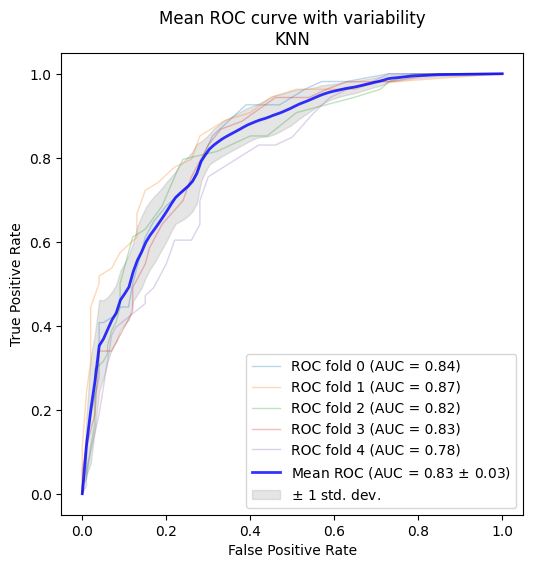

In [334]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n_splits=5
fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(ss.split(x, y)):
    knn_model.fit(x.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        knn_model,
        x.iloc[test],
        y.iloc[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\nKNN",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [335]:
print('SVM')
print('-'*50)

# Creating the hyperparameter grid
param_grid = {'C':np.logspace(-4, 4, 10)}

svm = LinearSVC()
# Instantiating GridSearchCV object
svm_model_cv = GridSearchCV(svm, param_grid, cv = ss,  scoring='accuracy')

result = svm_model_cv.fit(x_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision svm Parameters: {}".format(result.best_params_))

print('-'*50)

svm_model = svm_model_cv.best_estimator_
svm_scores = cross_validate(svm_model, x_train, y_train,return_train_score=True, scoring=['accuracy', 'balanced_accuracy', 'recall','precision','f1'])
pred_svm = cross_val_predict(svm_model, x_test, y_test)

# Calculate and print the overall classification report
overall_report = classification_report(y_test, pred_svm)
print("Overall Classification Report:\n", overall_report)
print(f"\n Training Accuracy : {svm_scores['train_accuracy'].mean()}, \n Testing Accuracy : {svm_scores['test_accuracy'].mean()}, \n Balanced Accuracy : {svm_scores['test_balanced_accuracy'].mean()}, \n Precision : {svm_scores['test_precision'].mean()}, \n Recall : {svm_scores['test_recall'].mean()}, \n F1-svm_scores : {svm_scores['test_f1'].mean()}")
print('-'*50)

# Calculate and print the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test, pred_svm)
print("Overall Confusion Matrix:\n", overall_conf_matrix)
print('-'*50)

SVM
--------------------------------------------------
Tuned Decision svm Parameters: {'C': 2.782559402207126}
--------------------------------------------------
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231


 Training Accuracy : 0.7839800509567952, 
 Testing Accuracy : 0.7746278989269644, 
 Balanced Accuracy : 0.728439960064674, 
 Precision : 0.7259354838709677, 
 Recall : 0.5743954480796586, 
 F1-svm_scores : 0.6393871892758124
--------------------------------------------------
Overall Confusion Matrix:
 [[126  25]
 [ 31  49]]
--------------------------------------------------


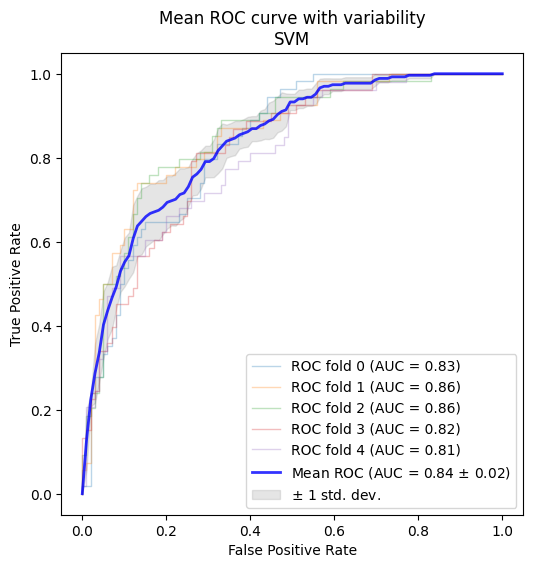

In [336]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n_splits=5
fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(ss.split(x, y)):
    svm_model.fit(x.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        svm_model,
        x.iloc[test],
        y.iloc[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\nSVM",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [337]:
print('Naive Bayes')
print('-'*50)
# Creating the hyperparameter grid
params_NB = {'var_smoothing': np.logspace(9,-9, num=100)}

gs=GaussianNB()
# Instantiating GridSearchCV object
gs_NB = GridSearchCV(estimator=gs,
                     param_grid=params_NB,
                     cv=ss,
                     verbose=1,
                     scoring='accuracy')
result = gs_NB.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Naive Bayes Parameters: {}".format(result.best_params_))


print('-'*50)

gs_model = gs_NB.best_estimator_
gs_scores = cross_validate(gs_model, x_train, y_train,return_train_score=True, scoring=['accuracy', 'balanced_accuracy', 'recall','precision','f1'])
pred_gs = cross_val_predict(gs_model, x_test, y_test)

# Calculate and print the overall classification report
overall_report = classification_report(y_test, pred_gs)
print("Overall Classification Report:\n", overall_report)
print(f"\n Training Accuracy : {gs_scores['train_accuracy'].mean()}, \n Testing Accuracy : {gs_scores['test_accuracy'].mean()}, \n Balanced Accuracy : {gs_scores['test_balanced_accuracy'].mean()}, \n Precision : {gs_scores['test_precision'].mean()}, \n Recall : {gs_scores['test_recall'].mean()}, \n F1-gs_scores : {gs_scores['test_f1'].mean()}")
print('-'*50)

# Calculate and print the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test, pred_gs)
print("Overall Confusion Matrix:\n", overall_conf_matrix)
print('-'*50)

Naive Bayes
--------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Naive Bayes Parameters: {'var_smoothing': 0.008111308307896857}
--------------------------------------------------
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231


 Training Accuracy : 0.7704851737409876, 
 Testing Accuracy : 0.7765489788854275, 
 Balanced Accuracy : 0.7410215020512504, 
 Precision : 0.7070474035741731, 
 Recall : 0.6223328591749644, 
 F1-gs_scores : 0.6599694423223835
--------------------------------------------------
Overall Confusion Matrix:
 [[122  29]
 [ 33  47]]
--------------------------------------------------


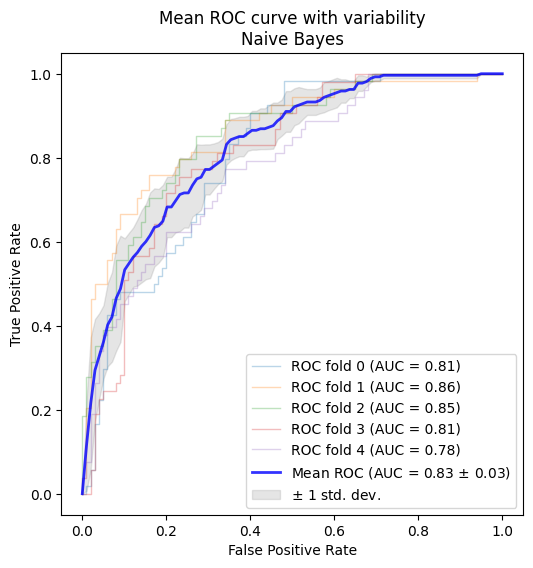

In [338]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n_splits=5
fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(ss.split(x, y)):
    gs_model.fit(x.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        gs_model,
        x.iloc[test],
        y.iloc[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\nNaive Bayes",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [354]:
print('Decision Tree')
print('-'*50)

# Creating the hyperparameter grid
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": ['sqrt', 'auto', 'log2'],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ['gini','entropy','log_loss']}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = ss,scoring='accuracy')

result = tree_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(result.best_params_))


print('-'*50)

dtree_model = tree_cv.best_estimator_
dtree_scores = cross_validate(dtree_model, x_train, y_train,return_train_score=True, scoring=['accuracy', 'balanced_accuracy', 'recall','precision','f1'])
pred_dtree = cross_val_predict(dtree_model, x_test, y_test)

# Calculate and print the overall classification report
overall_report = classification_report(y_test, pred_dtree)
print("Overall Classification Report:\n", overall_report)
print(f"\n Training Accuracy : {dtree_scores['train_accuracy'].mean()}, \n Testing Accuracy : {dtree_scores['test_accuracy'].mean()}, \n Balanced Accuracy : {dtree_scores['test_balanced_accuracy'].mean()}, \n Precision : {dtree_scores['test_precision'].mean()}, \n Recall : {dtree_scores['test_recall'].mean()}, \n F1-dtree_scores : {dtree_scores['test_f1'].mean()}")
print('-'*50)

# Calculate and print the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test, pred_dtree)
print("Overall Confusion Matrix:\n", overall_conf_matrix)
print('-'*50)

Decision Tree
--------------------------------------------------
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 7}
--------------------------------------------------
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       151
           1       0.54      0.54      0.54        80

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231


 Training Accuracy : 0.7960882528324389, 
 Testing Accuracy : 0.7298200069228106, 
 Balanced Accuracy : 0.6742012198533938, 
 Precision : 0.6892198879551822, 
 Recall : 0.4891891891891892, 
 F1-dtree_scores : 0.556859169589486
--------------------------------------------------
Overall Confusion Matrix:
 [[114  37]
 [ 37  43]]
--------------------------------------------------


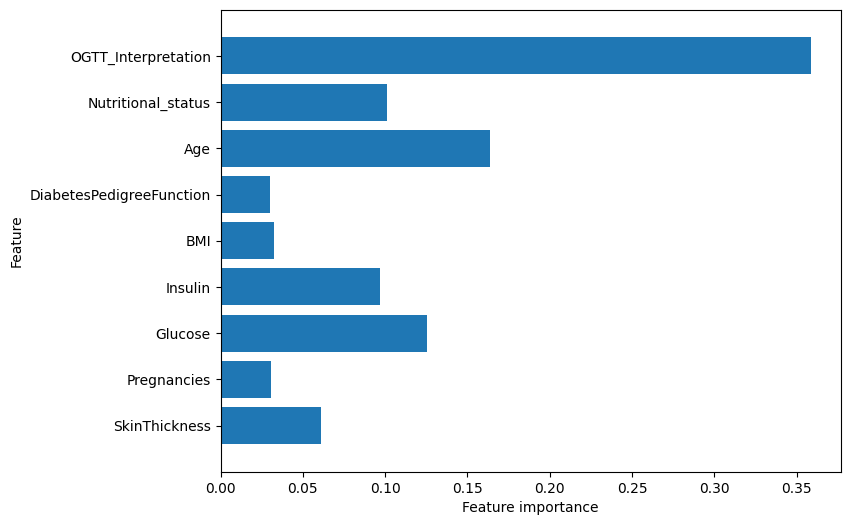

In [355]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 9
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dtree_model)
plt.savefig('feature_importance')

In [356]:
from sklearn.tree import export_graphviz
export_graphviz(dtree_model, out_file="tree.dot", class_names=["Diabetic", "Normal"],feature_names=x.columns, impurity=False, filled=True)

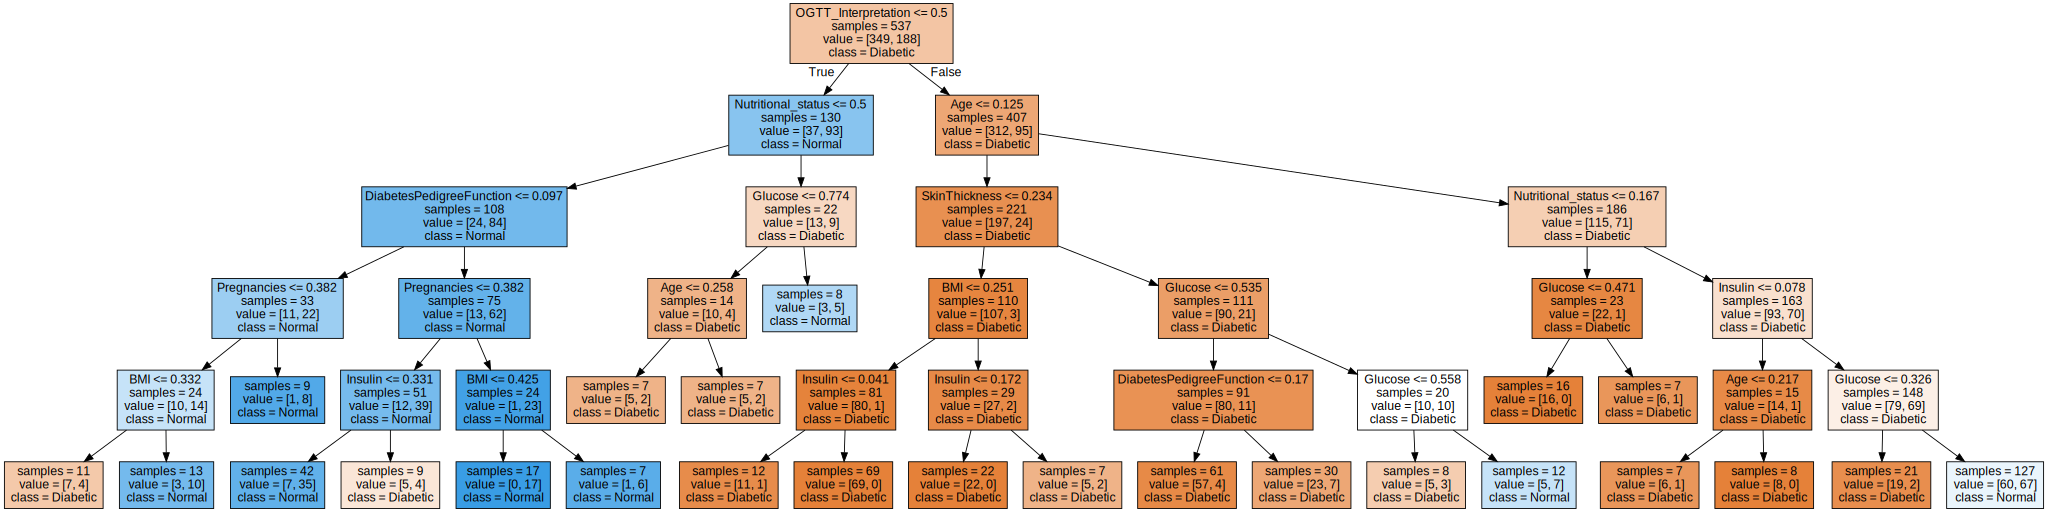

In [357]:
import graphviz
from IPython.display import display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

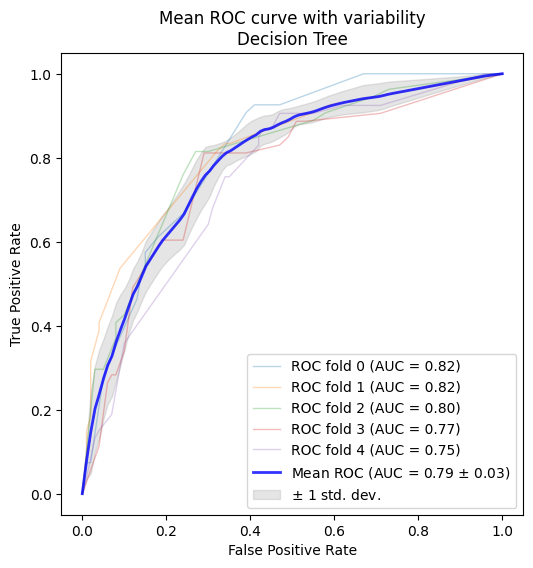

In [358]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
n_splits=5
fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(ss.split(x, y)):
    dtree_model.fit(x.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        dtree_model,
        x.iloc[test],
        y.iloc[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\nDecision Tree",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# **REFERENCES**

1. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data
2. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
3. https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/
4. https://towardsdatascience.com/hyperparameter-tuning-for-machine-learning-models-1b80d783b946
5. https://scikit-learn.org/stable/model_selection.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
7. https://scikit-learn.org/stable/modules/tree.html#classification
8. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
9. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
10. https://scikit-learn.org/stable/modules/cross_validation.html
11. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
12. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
13. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
14. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
